# Exploratory data analysis in Jupyter

### Keyboard shortcuts available in Edit and Command modes
* `Enter` key to enter Edit mode (`Escape` to enter Command mode)
* `Ctrl`-`Enter`: run the cell
* `Shift`-`Enter`: run the cell and select the cell below
* `Alt`-`Enter`: run the cell and insert a new cell below
* `Ctrl`-`s`: save the notebook

### Useful keyboard shortcuts in **Command mode**
 - `Tab` key for code completion or indentation
 - `m` and `y` to toggle between Markdown and Code cells
 - `d-d` to delete a cell
 - `z` to undo deleting
 - `a/b` to insert cells above/below current cell
 - `x/c/v` to cut/copy/paste cells
 - `Up/Down` or `k/j` to select previous/next cells

> Some of the following material has been adapted from an example in the [IPython Cookbook](http://ipython-books.github.io/), by Cyrille Rossant, Packt Publishing, 2014.


We start with three important Python packages
- `matplotlib` is the standard Python package for plotting, "grandfather of all Python visualization packages"
- `numpy` is the fundamental package for scientific computing with Python
- `pandas` is a more recently developed package for data manipulation and analysis 

We will download and process a dataset about attendance on Montreal's bicycle tracks. 

The first step is to import the python modules that will be used


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Location of dataset 

In [ ]:
url = "https://github.com/ipython-books/cookbook-data/raw/master/bikes.csv"

Pandas defines a `read_csv` function that can read any CSV file. By giving the URL to the file, Pandas will automatically download and parse the file, and return a `DataFrame` object. We need to specify a few options to make sure the dates are parsed correctly.

In [ ]:
pd.read_csv?

In [ ]:
#df = pd.read_csv(url, index_col='Date', parse_dates=True, dayfirst=True)
df = pd.read_csv("data/bikes.csv", index_col='Date', parse_dates=True, dayfirst=True) # in case of internet problems

The `df` variable now contains a `DataFrame` object, a Pandas data structure that contains 2D tabular data. The `head(n)` method displays the first `n` rows of this table.

In [ ]:
df.head(5)

Every row contains the number of bicycles on every track of the city, for every day of the year.

Get some summary statistics of the table with the `describe` method:

In [ ]:
df.describe()

Pandas has plotting capabilities through a layer over `matplotlib`  
Let's plot the daily attendance of two tracks. First, we select the two columns `'Berri1'` and `'PierDup'`. Then, we call the `plot` method

In [ ]:
df[['Berri1', 'PierDup']].plot(figsize=(8,4),
                               style=['-', '--']);

Let's now look at the attendance of all tracks as a function of the weekday. We can get the week day easily with Pandas: the `index` attribute of the `DataFrame` contains the dates of all rows in the table. This index has a few date-related attributes, including `weekday`.

In [ ]:
df.index.weekday

However, we would like to have names (Monday, Tuesday, etc.) instead of numbers between 0 and 6. First, we create an array `days` with all weekday names. Then, we index it by `df.index.weekday`. This operation replaces every integer in the index by the corresponding name in `days`. The first element, `Monday`, has index 0, so every 0 in `df.index.weekday` is replaced by `Monday`, and so on. We assign this new index to a new column `Weekday` in the `DataFrame`.

In [ ]:
days = np.array(['Monday', 'Tuesday', 'Wednesday', 
                 'Thursday', 'Friday', 'Saturday', 
                 'Sunday'])
df['Weekday'] = days[df.index.weekday]

In [ ]:
df.head(5)

To get the attendance as a function of the weekday, we need to group the table by the weekday. The `groupby` method lets us do just that. Once grouped, we can sum all rows in every group.

In [ ]:
df.groupby?

In [ ]:
df_week = df.groupby('Weekday',sort=False).sum()

In [ ]:
df_week

We can now display this information in a figure. We first need to reorder the table by the weekday using `ix` (indexing operation). Then, we plot the table, specifying the line width and the figure size.

In [ ]:
df_week.ix[days].plot(lw=3, figsize=(6,4));
plt.ylim(0);  # Set the bottom axis to 0.

Finally, let's illustrate interactive capabilities through `widgets`. We plot a *smoothed* version of the track attendance as a function of time (**rolling mean**). The idea is to compute the mean value in the neighborhood of any day. The larger the neighborhood, the smoother the curve. We will create an interactive slider in the notebook to vary this parameter in real-time in the plot.

In [ ]:
from ipywidgets import interact
#from IPython.html.widgets import interact # IPython < 4.x
@interact
def plot(n=(1, 30)):
    plt.figure(figsize=(8,4));
    pd.rolling_mean(df['Berri1'], n).dropna().plot();
    plt.ylim(0, 8000);
    plt.show();

### <font color="red"> *Exercise* </font>

- Create a widget that computes the square of integers between 0 and 10!

### <font color="green"> *Solution* </font>

In [ ]:
from ipywidgets import interact  # IPython.html.widgets before IPython 4.0
@interact(x=(0, 10))
def square(x):
    return("The square of %d is %d." % (x, x**2))

## Seaborn

- while `matplotlib` is extremely powerful, it can also be complex. 
- sometimes much effort needed to get good-looking graphs
- `seaborn` is a higher-level visualization package based on `matplotlib`
- default visualization much more appealing compared to `matplotlib`!


### <font color="blue"> Demo: Seaborn </font>

We first load the `seaborn` module 

In [ ]:
import seaborn as sns

`Seaborn`'s `heatmap` plots a heatmap for a `numpy` array

In [ ]:
ax = sns.heatmap(df_week.ix[days],linewidths=.5)

### <font color="red"> *Exercise* </font>

- Annotate each cell with the numeric value using integer formatting!

### <font color="green"> *Solution* </font>

In [ ]:
sns.heatmap?

In [ ]:
ax = sns.heatmap(df_week.ix[days],linewidths=.5, annot=True, fmt="d")

### Nobel prizes 

We move on to another dataset, importing packages we need and loading dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# dataset from http://oppnadata.se/en/dataset/nobel-prizes/resource/f3da8ba9-a17f-4911-9003-4bcef93619cc
nobel = pd.read_csv("data/nobels.csv")
nobel

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,Munich,male,1901.0,physics,NaN,1.0,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany
1,2,Hendrik Antoon,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,NaN,male,1902.0,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Leiden University,Leiden,the Netherlands
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,Amsterdam,male,1902.0,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Amsterdam University,Amsterdam,the Netherlands
3,4,Antoine Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,NaN,male,1903.0,physics,NaN,2.0,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,Paris,male,1903.0,physics,NaN,4.0,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France
5,6,Marie,"Curie, née Sklodowska",1867-11-07,1934-07-04,Russian Empire (now Poland),PL,Warsaw,France,FR,Sallanches,female,1903.0,physics,NaN,4.0,"""in recognition of the extraordinary services ...",NaN,NaN,NaN
6,6,Marie,"Curie, née Sklodowska",1867-11-07,1934-07-04,Russian Empire (now Poland),PL,Warsaw,France,FR,Sallanches,female,1911.0,chemistry,NaN,1.0,"""in recognition of her services to the advance...",Sorbonne University,Paris,France
7,8,Lord Rayleigh,(John William Strutt),1842-11-12,1919-06-30,United Kingdom,GB,"Langford Grove, Maldon, Essex",United Kingdom,GB,NaN,male,1904.0,physics,NaN,1.0,"""for his investigations of the densities of th...",Royal Institution of Great Britain,London,United Kingdom
8,9,Philipp Eduard Anton,von Lenard,1862-06-07,1947-05-20,Hungary (now Slovakia),SK,Pressburg (now Bratislava),Germany,DE,Messelhausen,male,1905.0,physics,NaN,1.0,"""for his work on cathode rays""",Kiel University,Kiel,Germany
9,10,Joseph John,Thomson,1856-12-18,1940-08-30,United Kingdom,GB,"Cheetham Hill, near Manchester",United Kingdom,GB,Cambridge,male,1906.0,physics,NaN,1.0,"""in recognition of the great merits of his the...",University of Cambridge,Cambridge,United Kingdom


Add column with ones (one Nobel prize per laureate...)

In [18]:
nobel["number"]=1

In [20]:
nobel.count()

id                   975
firstname            969
surname              939
born                 975
died                 975
bornCountry          943
bornCountryCode      943
bornCity             941
diedCountry          603
diedCountryCode      602
diedCity             597
gender               975
year                 969
category             969
overallMotivation     16
share                969
motivation           881
name                 722
city                 716
country              716
number               975
dtype: int64

### <font color="red"> *Exercise*

- Use the groupby method and `sum()` to extract total numbers of Nobel prizes by country

### <font color="green"> *Solution* </font>

In [4]:
nobels_by_country = nobel.groupby('country',sort=False).sum()
nobels_by_country

,id,year,share,number
country,,,,
Germany,13313,98614.0,75.0,51
the Netherlands,2660,21416.0,19.0,11
France,15386,78498.0,86.0,40
United Kingdom,32092,178681.0,191.0,91
USA,174455,720168.0,865.0,363
"Alsace (then Germany, now France)",14,1909.0,2.0,1
Sweden,4904,33180.0,31.0,17
Denmark,2634,17571.0,17.0,9
India,37,1930.0,1.0,1


Let's extract just the number of prizes per country

In [5]:
# extract Series from DataFrame:
print(type(nobels_by_country))
nobels_by_country = nobels_by_country["number"]
print(type(nobels_by_country))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [6]:
nobels_by_country

country
Germany                               51
the Netherlands                       11
France                                40
United Kingdom                        91
USA                                  363
Alsace (then Germany, now France)      1
Sweden                                17
Denmark                                9
India                                  1
Austria                                6
Italy                                  6
Japan                                 18
Ireland                                1
Federal Republic of Germany           26
USSR                                  11
Switzerland                           22
Canada                                 7
Finland                                1
Czechoslovakia                         1
Norway                                 5
Argentina                              2
Belgium                                6
Russia                                 3
Spain                                  1
Hungary 

Hmm, West Germany is listed separately. Let's unify Germany!

In [7]:
nobel = nobel.replace(to_replace="Federal Republic of Germany",value="Germany")
nobels_by_country = nobel.groupby('country',sort=False).sum()
nobels_by_country = nobels_by_country["number"]
nobels_by_country

country
Germany                               77
the Netherlands                       11
France                                40
United Kingdom                        91
USA                                  363
Alsace (then Germany, now France)      1
Sweden                                17
Denmark                                9
India                                  1
Austria                                6
Italy                                  6
Japan                                 18
Ireland                                1
USSR                                  11
Switzerland                           22
Canada                                 7
Finland                                1
Czechoslovakia                         1
Norway                                 5
Argentina                              2
Belgium                                6
Russia                                 3
Spain                                  1
Hungary                                1
Portugal

How many prizes has Finland received?

In [8]:
nobels_by_country["Finland"]

1

Who was it?

In [9]:
nobel.loc?

In [10]:
nobel.loc[nobel['country'] == "Finland"]

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,gender,year,category,overallMotivation,share,motivation,name,city,country,number
212,203,Artturi Ilmari,Virtanen,1895-01-15,1973-11-11,Russian Empire (now Finland),FI,Helsinki,Finland,FI,...,male,1945.0,chemistry,NaN,1.0,"""for his research and inventions in agricultur...",University of Helsinki,Helsinki,Finland,1


Ok, this dataset seems to be incomplete, according to [this link](https://en.wikipedia.org/wiki/List_of_Nobel_laureates_by_country#Finland) Finland has received 5 prizes...

We move on. Let's extract four countries with the highest number of prizes, and generate some plots

In [11]:
countries = np.array(["Germany", "France", "USA", "United Kingdom"])

In [12]:
nobel2 = nobel.loc[nobel['country'].isin(countries)]
nobel2

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,gender,year,category,overallMotivation,share,motivation,name,city,country,number
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,...,male,1901.0,physics,NaN,1.0,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany,1
3,4,Antoine Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,...,male,1903.0,physics,NaN,2.0,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France,1
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,...,male,1903.0,physics,NaN,4.0,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France,1
6,6,Marie,"Curie, née Sklodowska",1867-11-07,1934-07-04,Russian Empire (now Poland),PL,Warsaw,France,FR,...,female,1911.0,chemistry,NaN,1.0,"""in recognition of her services to the advance...",Sorbonne University,Paris,France,1
7,8,Lord Rayleigh,(John William Strutt),1842-11-12,1919-06-30,United Kingdom,GB,"Langford Grove, Maldon, Essex",United Kingdom,GB,...,male,1904.0,physics,NaN,1.0,"""for his investigations of the densities of th...",Royal Institution of Great Britain,London,United Kingdom,1
8,9,Philipp Eduard Anton,von Lenard,1862-06-07,1947-05-20,Hungary (now Slovakia),SK,Pressburg (now Bratislava),Germany,DE,...,male,1905.0,physics,NaN,1.0,"""for his work on cathode rays""",Kiel University,Kiel,Germany,1
9,10,Joseph John,Thomson,1856-12-18,1940-08-30,United Kingdom,GB,"Cheetham Hill, near Manchester",United Kingdom,GB,...,male,1906.0,physics,NaN,1.0,"""in recognition of the great merits of his the...",University of Cambridge,Cambridge,United Kingdom,1
10,11,Albert Abraham,Michelson,1852-12-19,1931-05-09,Prussia (now Poland),PL,Strelno (now Strzelno),USA,US,...,male,1907.0,physics,NaN,1.0,"""for his optical precision instruments and the...",University of Chicago,"Chicago, IL",USA,1
11,12,Gabriel,Lippmann,1845-08-16,1921-07-13,Luxembourg,LU,Hollerich,NaN,NaN,...,male,1908.0,physics,NaN,1.0,"""for his method of reproducing colours photogr...",Sorbonne University,Paris,France,1
12,13,Guglielmo,Marconi,1874-04-25,1937-07-20,Italy,IT,Bologna,Italy,IT,...,male,1909.0,physics,NaN,2.0,"""in recognition of their contributions to the ...",Marconi Wireless Telegraph Co. Ltd.,London,United Kingdom,1


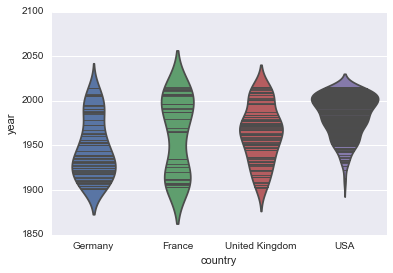

In [13]:
sns.violinplot(y="year", x="country",inner="stick", data=nobel2);

We can also use multiple conditions. Let's extract only physics prizes

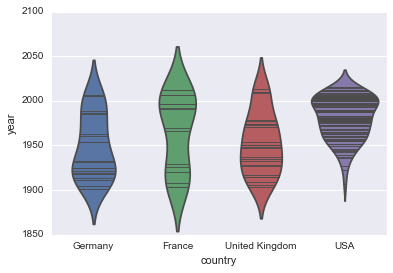

In [14]:
nobel3 = nobel.loc[nobel['country'].isin(countries) & nobel['category'].isin(['physics'])]
sns.violinplot(y="year", x="country",inner="stick", data=nobel3);

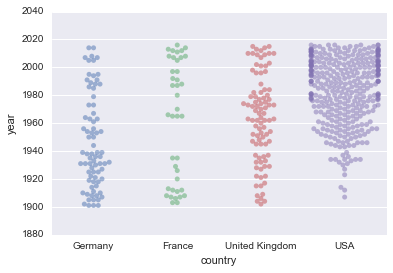

In [15]:
sns.swarmplot(y="year", x="country", data=nobel2, alpha=.5);

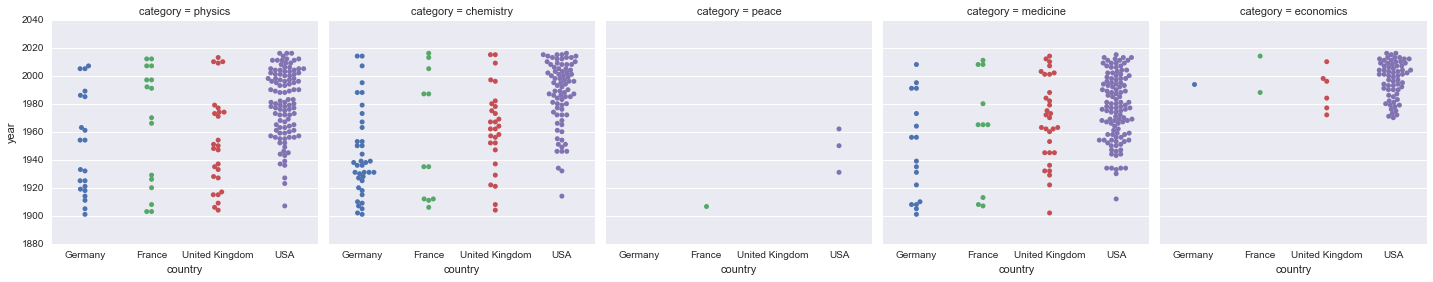

In [16]:
sns.factorplot(x="country", y="year", col="category", data=nobel2, kind="swarm");

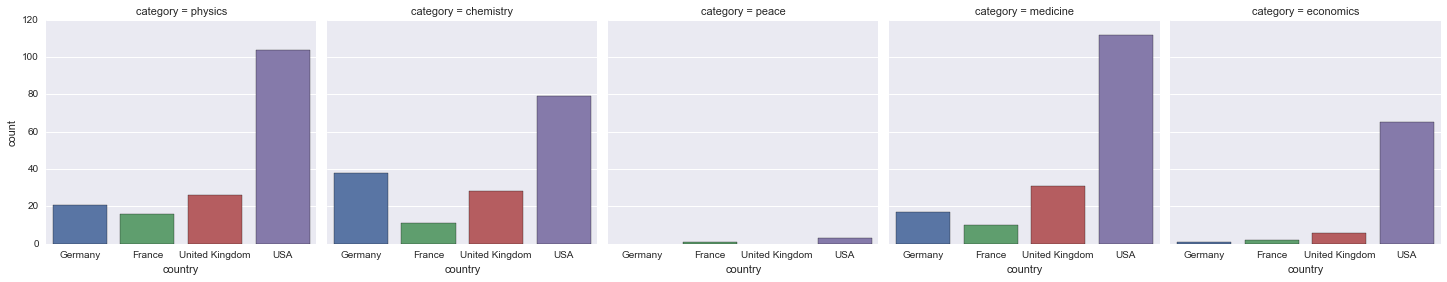

In [17]:
sns.factorplot(x="country", col="category", data=nobel2, kind="count");

## Other types of media

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('j9YpkSX7NNM')

In [ ]:
from IPython.display import Audio
Audio("data/GW150914_L1_whitenbp.wav")